# Multiply the partition function by $\frac{1}{(N-1)!!}$

- The $Z_B$ or Partition function is $Z_B= \sum_{\epsilon_i}  \Omega(\epsilon_i) e^{- \tilde{\beta} \epsilon_i}$. If we multiply it with $\frac{1}{(N-1)!!}$ we get

### $Z = \frac{1}{(N-1)!!} Z_B= \frac{1}{(N-1)!!} \sum_{\epsilon_i}  \Omega(\epsilon_i) e^{- \tilde{\beta} \epsilon_i}$

So the free energy is

$F = -T \ln(Z) = -T \ln(Z_B) - T\frac{N}{2}\ln(N) + T\frac{N}{2} (1 + \ln 2) $

where we used the Stirling's approximation for $N!$

In [1]:
from scipy.special import comb
from scipy.misc import factorial2
from scipy.special import lambertw
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from math import exp, sqrt, log,pow
import gc
import random
import matplotlib as mpl
from decimal import *
getcontext().prec = 64

mpl.rcParams['figure.figsize'] = (10,10)

# Magnetic coins exact energy degenercy

## $ \Omega(\epsilon) = \sum_{p = 0}^{\epsilon/2} {N \choose N-2p}{N-2p \choose \frac{N-2p-\epsilon}{2}} (2p-1)!!$

## Note: This is the exact relation.

In [2]:
def n_p_mag_exact(L,p):
    n_pairs = 2*p
    #possible combinations for p pairs is (2p-1)!!
    return  Decimal(int(factorial2(n_pairs-1)))

def n_s_mag_exact(L,p,e):
    n_pairs = 2*p
    n_singles = L - n_pairs
    #The energy or e is always negative or zero
    #so the number os up sites is half of the all non-paires minue the energy 
    #note that e or energy is correspond to down sites that has not canceled by up ones
    n_up = (n_singles+e )/2
    #first ons is choosing n_singles from all sites or L
    #second one is choosing n_up from n_singles
    ret = Decimal(comb(L, n_singles, exact=True)) * Decimal(comb(n_singles, n_up, exact=True))
    return Decimal(1) if(ret == Decimal(0)) else ret

def n_E_mag_exact(L):
    n_Es = np.zeros(L+1)
    #enumarte on all energies from -Ground states to zero
    for idx,e in enumerate(range(-L,1,2)):
        #enumartes all possible paires for current energy
        for p in range(0,int((L+e)/2+1)):
            #sum the previous configurations number for current energy
            #with the current one for the p pairs and remaining up/down sites
            n_Es[idx] = Decimal(n_Es[idx]) + n_p_mag_exact(L,p)*n_s_mag_exact(L,p,e)
        #calculate the positive energies by using the symtery argument
        n_Es[L-idx] = n_Es[idx]
    return n_Es

# Partition function

## $Z = \sum_{\epsilon_i}  \Omega(\epsilon_i) e^{- \tilde{\beta} \epsilon_i}$

## Note: The partition function is absolute. No density is used here.

In [3]:
def partition_F_2(omega_E,beta_tilde):
    """
    omega_E: energy degeneracy array
    beta_tilde: temprature like real number
    Return: Partition function
    """
    #L is the size of the 1D Ising chain
    L = len(omega_E)-1    
    #Calculate the partition function at T
    Z = sum(map(lambda E,n_E: Decimal(0.0) if(n_E == 0) else Decimal(-float(beta_tilde)*E + log(n_E)).exp(),\
                range(-L,L + 1,2),omega_E))
    return Z   

def avg_energy(omega_E,beta_tilde,Z):
    """
    omega_E: energy degeneracy array
    beta_tilde: temprature like real number
    Z: Partition function at beta_tilde 
    Return: average energy
    """
    #L is the size of the 1D Ising chain
    L = len(omega_E)-1    
    #Calculate the partition function at T
    e_sum = sum(map(lambda E,n_E: Decimal(0.0) if(n_E == 0) else Decimal(E)*Decimal(-float(beta_tilde)*E + log(n_E)).exp(),\
                    range(-L,L + 1,2),omega_E))
    return e_sum/Z

# The below definition of entropy include the effect of $\frac{1}{(N-1)!!}$

In [9]:
def entropy_I(L,beta_tilde):    
    omega_E = n_E_mag_exact(L)
    Z = partition_F_2(omega_E,beta_tilde)
    e_bar = avg_energy(omega_E,beta_tilde,Z)
    S_B = Decimal(beta_tilde)*e_bar + Z.ln() + Decimal(-(L/2.0)*log(L)+(L/2.0)*(1.0+log(2.0)))   
    return S_B

def specific_entropy_I(L,beta_tilde):
    return entropy_I(L,beta_tilde)/L 

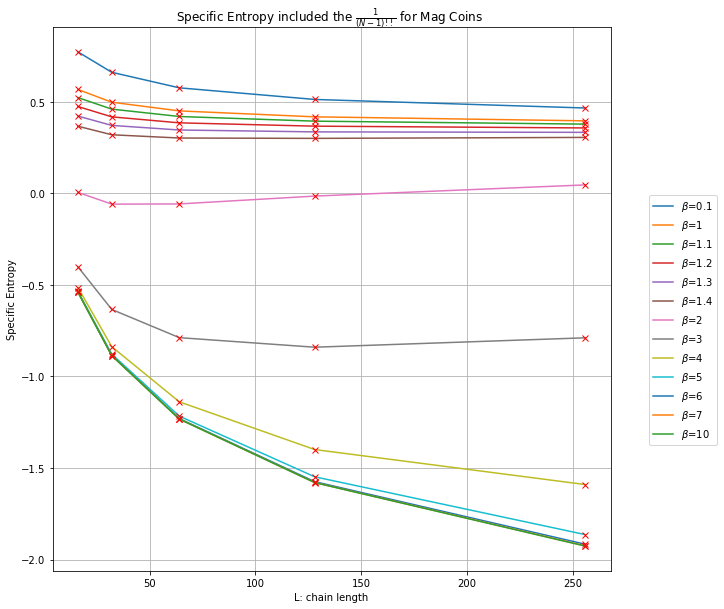

In [10]:
sizes = [16,32,64,128,256]

T_0_1 = list(map(lambda n: specific_entropy_I(n,0.1),sizes))
T1 = list(map(lambda n: specific_entropy_I(n,1.0),sizes))
T1_1 = list(map(lambda n: specific_entropy_I(n,1.1),sizes))
T1_2 = list(map(lambda n: specific_entropy_I(n,1.2),sizes))
T1_3 = list(map(lambda n: specific_entropy_I(n,1.3),sizes))
T1_4 = list(map(lambda n: specific_entropy_I(n,1.4),sizes))
T2 = list(map(lambda n: specific_entropy_I(n,2.0),sizes))
T3 = list(map(lambda n: specific_entropy_I(n,3.0),sizes))
T4 = list(map(lambda n: specific_entropy_I(n,4.0),sizes))
T5 = list(map(lambda n: specific_entropy_I(n,5.0),sizes))
T6 = list(map(lambda n: specific_entropy_I(n,6.0),sizes))
T7 = list(map(lambda n: specific_entropy_I(n,7.0),sizes))
T10 = list(map(lambda n: specific_entropy_I(n,10.0),sizes))

plt.plot(sizes,T_0_1,label=r'$\beta$=0.1')
plt.plot(sizes,T_0_1,'rx')
plt.plot(sizes,T1,label=r'$\beta$=1')
plt.plot(sizes,T1,'rx')
plt.plot(sizes,T1_1,label=r'$\beta$=1.1')
plt.plot(sizes,T1_1,'rx')
plt.plot(sizes,T1_2,label=r'$\beta$=1.2')
plt.plot(sizes,T1_2,'rx')
plt.plot(sizes,T1_3,label=r'$\beta$=1.3')
plt.plot(sizes,T1_3,'rx')
plt.plot(sizes,T1_4,label=r'$\beta$=1.4')
plt.plot(sizes,T1_4,'rx')
plt.plot(sizes,T2,label=r'$\beta$=2')
plt.plot(sizes,T2,'rx')
plt.plot(sizes,T3,label=r'$\beta$=3')
plt.plot(sizes,T3,'rx')
plt.plot(sizes,T4,label=r'$\beta$=4')
plt.plot(sizes,T4,'rx')
plt.plot(sizes,T5,label=r'$\beta$=5')
plt.plot(sizes,T5,'rx')
plt.plot(sizes,T6,label=r'$\beta$=6')
plt.plot(sizes,T6,'rx')
plt.plot(sizes,T7,label=r'$\beta$=7')
plt.plot(sizes,T7,'rx')
plt.plot(sizes,T10,label=r'$\beta$=10')
plt.plot(sizes,T10,'rx')
plt.grid()
plt.legend(bbox_to_anchor=(1.2,0.7))
plt.title(r'Specific Entropy included the $\frac{1}{(N-1)!!}$ for Mag Coins  '  )
plt.xlabel('L: chain length')
plt.ylabel('Specific Entropy')
plt.show()



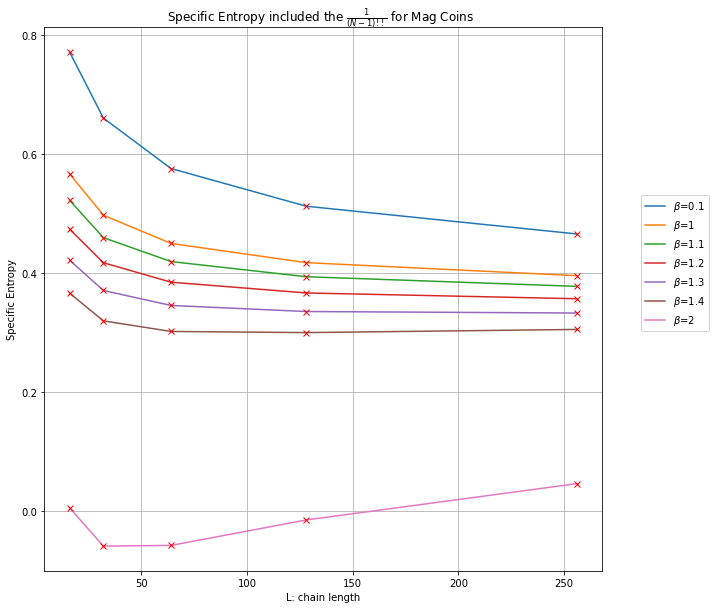

In [11]:
plt.plot(sizes,T_0_1,label=r'$\beta$=0.1')
plt.plot(sizes,T_0_1,'rx')
plt.plot(sizes,T1,label=r'$\beta$=1')
plt.plot(sizes,T1,'rx')
plt.plot(sizes,T1_1,label=r'$\beta$=1.1')
plt.plot(sizes,T1_1,'rx')
plt.plot(sizes,T1_2,label=r'$\beta$=1.2')
plt.plot(sizes,T1_2,'rx')
plt.plot(sizes,T1_3,label=r'$\beta$=1.3')
plt.plot(sizes,T1_3,'rx')
plt.plot(sizes,T1_4,label=r'$\beta$=1.4')
plt.plot(sizes,T1_4,'rx')
plt.plot(sizes,T2,label=r'$\beta$=2')
plt.plot(sizes,T2,'rx')

plt.grid()
plt.legend(bbox_to_anchor=(1.2,0.7))
plt.title(r'Specific Entropy included the $\frac{1}{(N-1)!!}$ for Mag Coins  '  )
plt.xlabel('L: chain length')
plt.ylabel('Specific Entropy')
plt.show()
